<a href="https://colab.research.google.com/github/aekanun2020/AdvancedStat/blob/main/2025_ih_EGAT_ARIMA_ENG_revision_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 3: ARIMA/SARIMA Models for Time Series Analysis in Electrical Systems

## Part 1: Creating Simulated Electricity Production Data
Creating hourly electricity production simulation data...


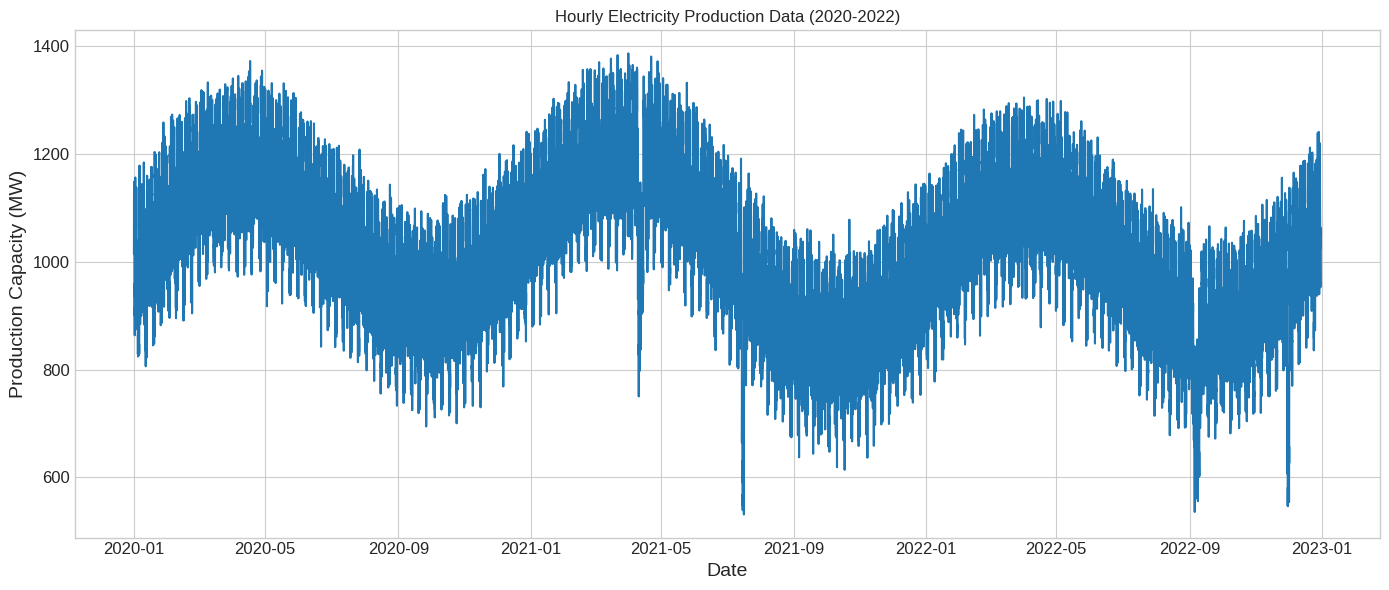


Created daily data by resampling from hourly data: 1096 days


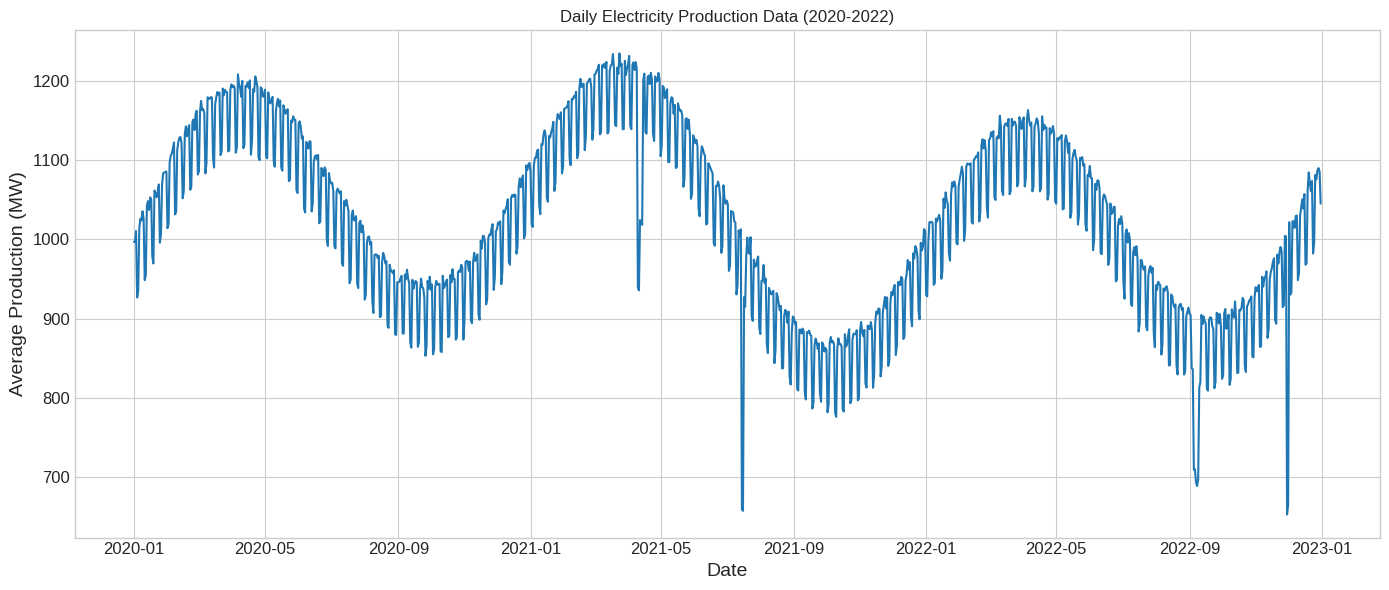


## Part 2: Data Preparation and Dataset Splitting
Dataset dimensions:
Total data: 1096 days
Training set: 1065 days (Jan 2020 - Nov 2022)
Test set: 31 days (Dec 2022)

## Part 3: Manual Auto-ARIMA Implementation

## Part 4: ACF and PACF Analysis and Parameter Selection for ARIMA Models
Testing stationarity of original data:
ADF Statistic: -1.2368
p-value: 0.6576
Critical Values:
	1%: -3.4366
	5%: -2.8643
	10%: -2.5682
Data is non-stationary, may need transformation before using ARIMA models

Applying First-order differencing to improve stationarity:
ADF Statistic: -6.3192
p-value: 0.0000
Critical Values:
	1%: -3.4366
	5%: -2.8643
	10%: -2.5682
Data is stationary, suitable for ARIMA modeling


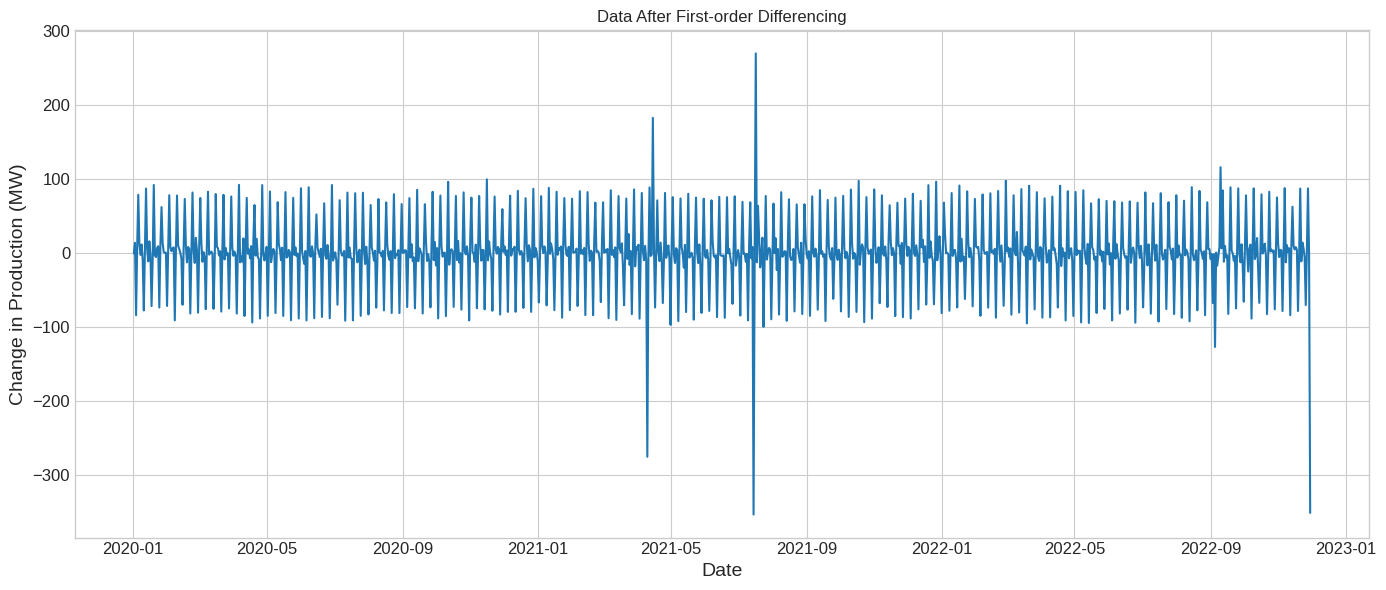


Analyzing ACF and PACF of original data:


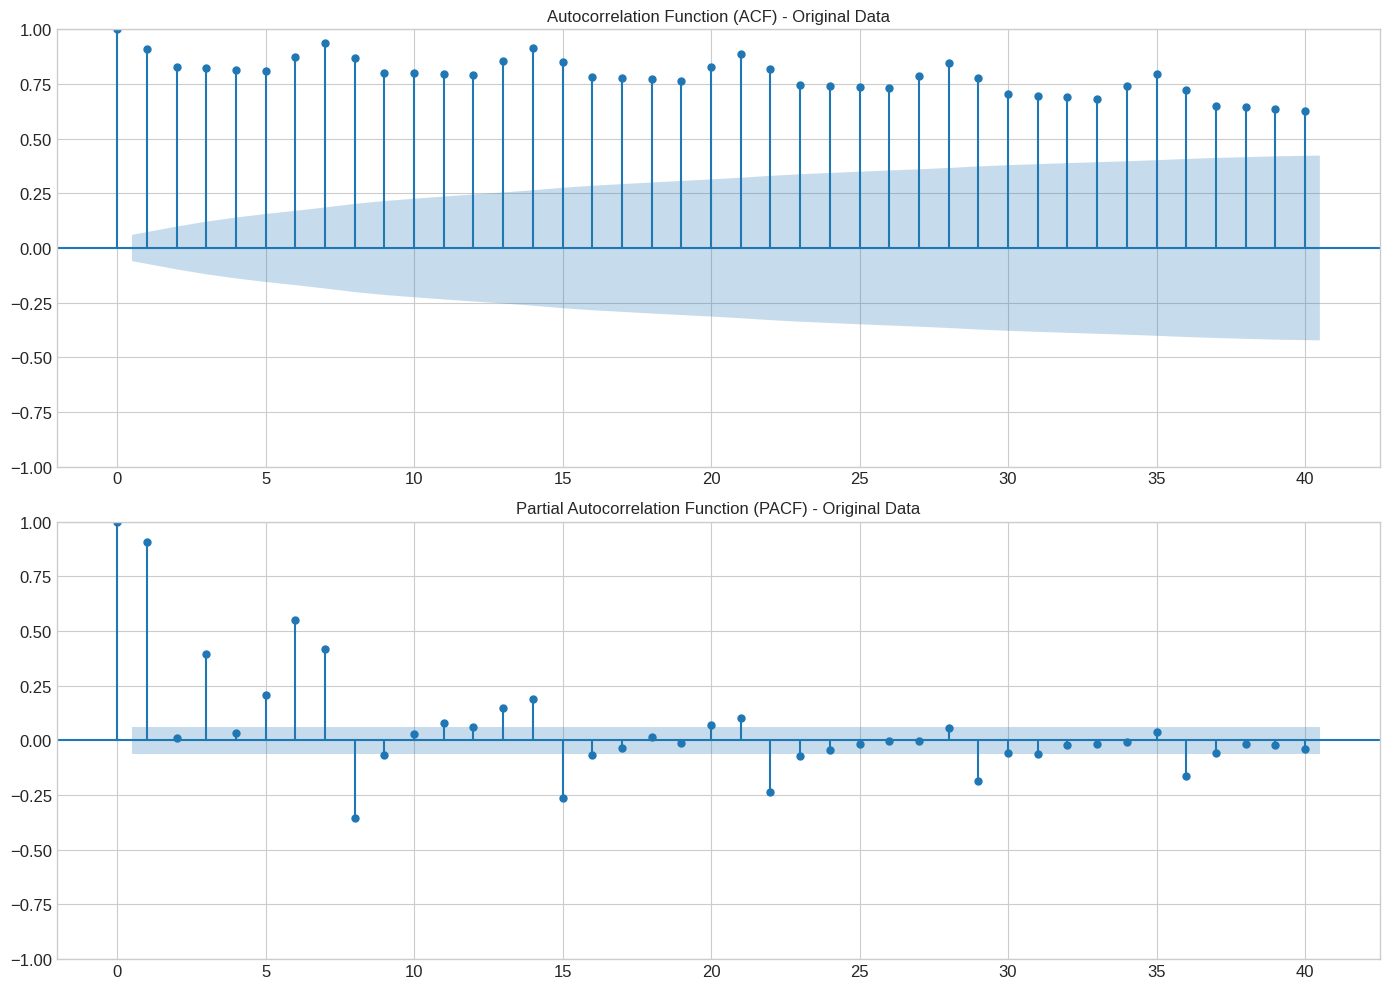


Selected parameters: ARIMA(1,1,1)


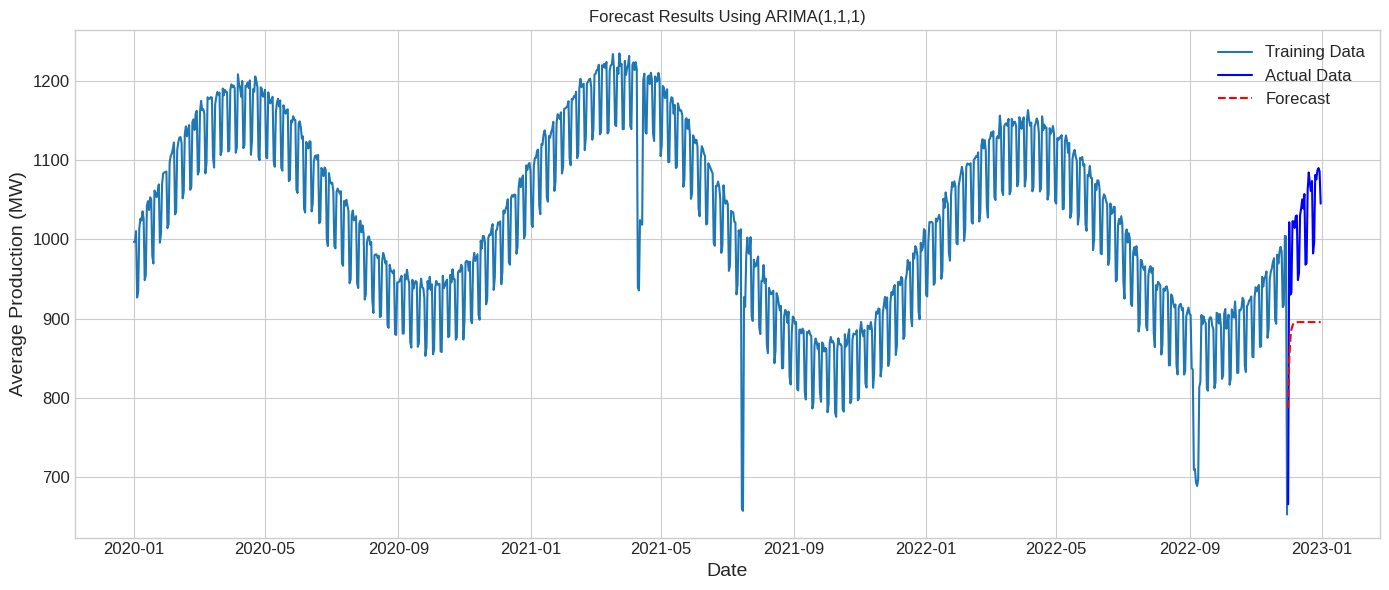


Model Evaluation Results for ARIMA(1,1,1):
MAE: 135.40 MW
RMSE: 142.74 MW
MAPE: 13.20%

### Using Manual Auto-ARIMA to Find the Best Parameters
Searching for best parameters...
ARIMA(0,0,0) - AIC: 13128.01
ARIMA(0,0,1) - AIC: 12020.13
ARIMA(0,0,2) - AIC: 11559.08
ARIMA(0,1,0) - AIC: 11249.95
ARIMA(0,1,1) - AIC: 11211.64
ARIMA(0,1,2) - AIC: 10842.02
ARIMA(1,0,0) - AIC: 11222.91
ARIMA(1,0,1) - AIC: 11210.23
ARIMA(1,0,2) - AIC: 10856.18
ARIMA(1,1,0) - AIC: 11251.92
ARIMA(1,1,1) - AIC: 11032.60
ARIMA(1,1,2) - AIC: 10842.18
ARIMA(2,0,0) - AIC: 11223.58
ARIMA(2,0,1) - AIC: 11125.42
ARIMA(2,0,2) - AIC: 10856.34
ARIMA(2,1,0) - AIC: 11010.94
ARIMA(2,1,1) - AIC: 10863.46
ARIMA(2,1,2) - AIC: 10833.81

Best model: ARIMA(2, 1, 2) with AIC: 10833.81


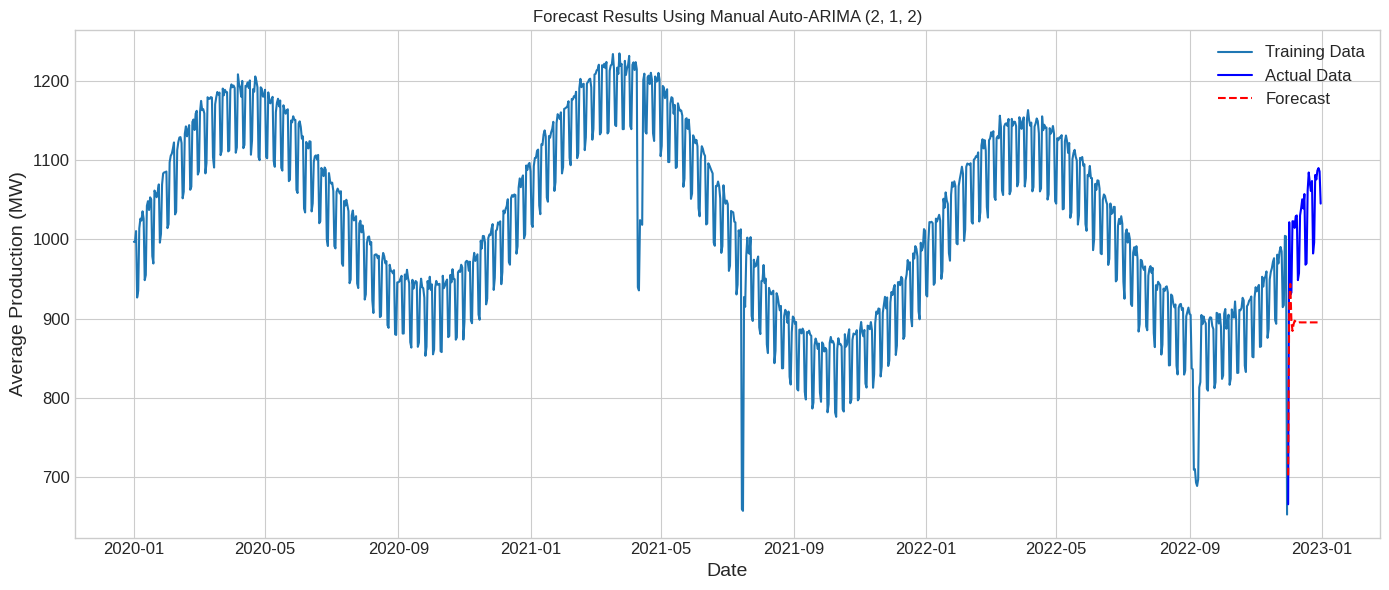


Model Evaluation Results for Manual Auto-ARIMA (2, 1, 2):
MAE: 129.01 MW
RMSE: 138.90 MW
MAPE: 12.41%

## Part 5: Developing SARIMA Models for Seasonal Data


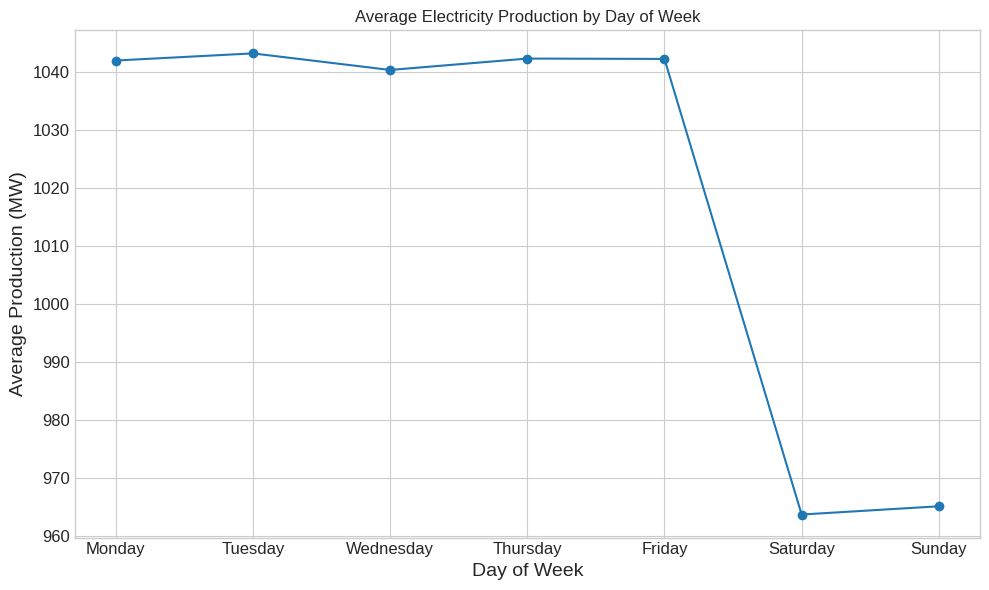


Building SARIMA(1,1,1)(1,1,1,7)


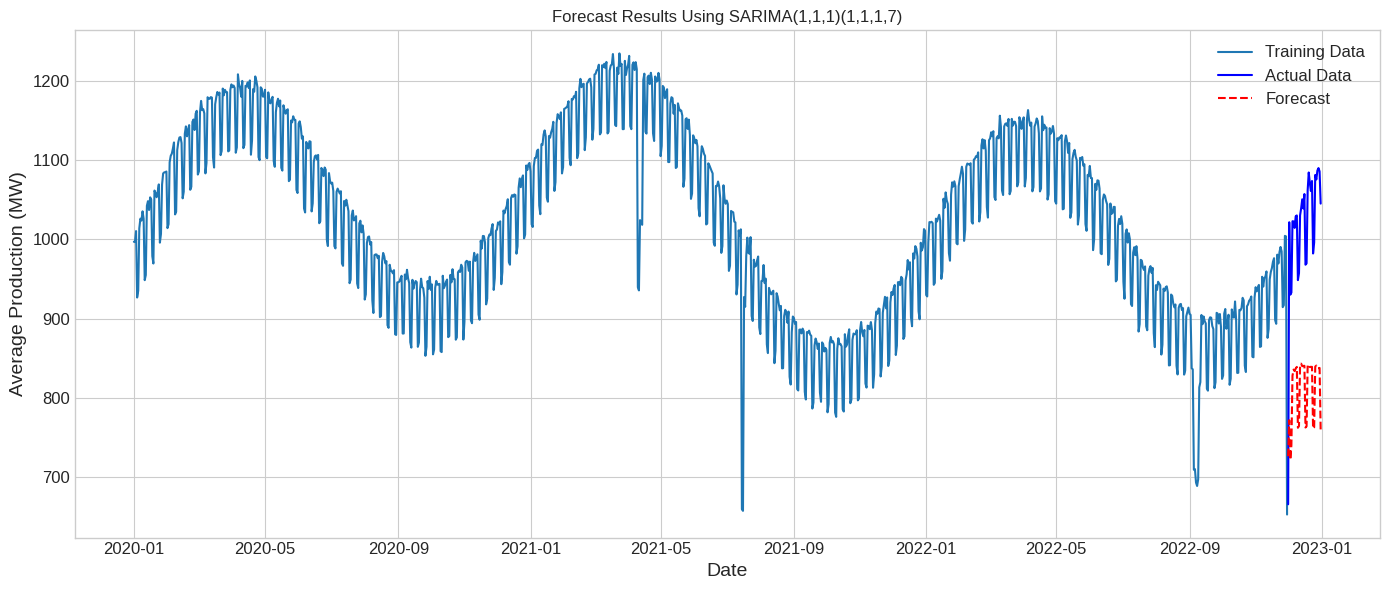


Model Evaluation Results for SARIMA(1,1,1)(1,1,1,7):
MAE: 212.05 MW
RMSE: 215.31 MW
MAPE: 20.70%

### Using Seasonal Manual Auto-ARIMA
Searching for best parameters...
SARIMA(0,0,0)(0,0,0,7) - AIC: 17793.28
SARIMA(0,0,0)(0,0,1,7) - AIC: 16412.62
SARIMA(0,0,0)(0,1,0,7) - AIC: 10769.08
SARIMA(0,0,0)(0,1,1,7) - AIC: 10669.87
SARIMA(0,0,0)(1,0,0,7) - AIC: 10886.70
SARIMA(0,0,0)(1,0,1,7) - AIC: 10787.66
SARIMA(0,0,0)(1,1,0,7) - AIC: 10652.79
SARIMA(0,0,0)(1,1,1,7) - AIC: 10654.39
SARIMA(0,0,1)(0,0,0,7) - AIC: 16371.08
SARIMA(0,0,1)(0,0,1,7) - AIC: 15170.07
SARIMA(0,0,1)(0,1,0,7) - AIC: 10296.12
SARIMA(0,0,1)(0,1,1,7) - AIC: 10132.25
SARIMA(0,0,1)(1,0,0,7) - AIC: 10406.81
SARIMA(0,0,1)(1,0,1,7) - AIC: 10243.46
SARIMA(0,0,1)(1,1,0,7) - AIC: 10127.59
SARIMA(0,0,1)(1,1,1,7) - AIC: 10116.83
SARIMA(0,0,2)(0,0,0,7) - AIC: 15206.76
SARIMA(0,0,2)(0,0,1,7) - AIC: 15019.17
SARIMA(0,0,2)(0,1,0,7) - AIC: 10213.68
SARIMA(0,0,2)(0,1,1,7) - AIC: 10001.52
SARIMA(0,0,2)(1,0,0,7) - AIC: 10321.06
SARIMA(0,0,2

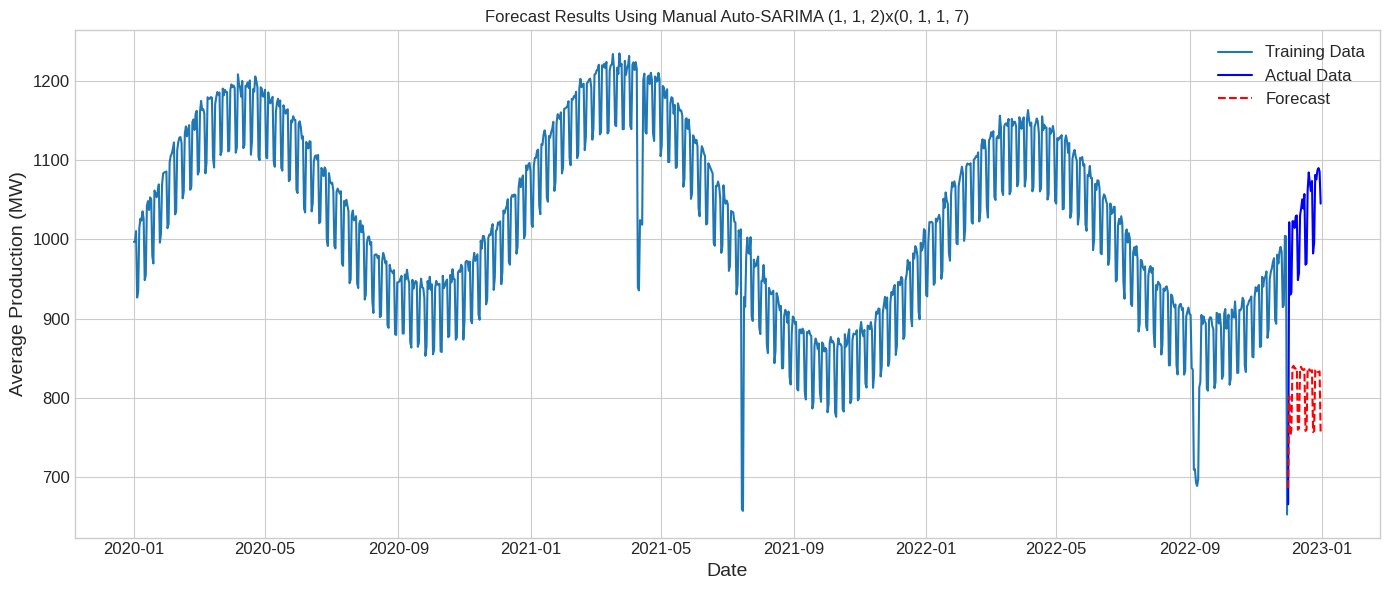


Model Evaluation Results for Manual Auto-SARIMA (1, 1, 2)x(0, 1, 1, 7):
MAE: 210.63 MW
RMSE: 215.31 MW
MAPE: 20.47%

## Part 6: Performance Comparison of All Models and Conclusion

Performance Comparison Table of All Models:
           ARIMA(1,1,1)  Auto-ARIMA  SARIMA(1,1,1)(1,1,1,7)  Auto-SARIMA
MAE (MW)     135.402636  129.009599              212.045969   210.634371
RMSE (MW)    142.736801  138.896049              215.308148   215.309087
MAPE (%)      13.197606   12.411248               20.700081    20.473235


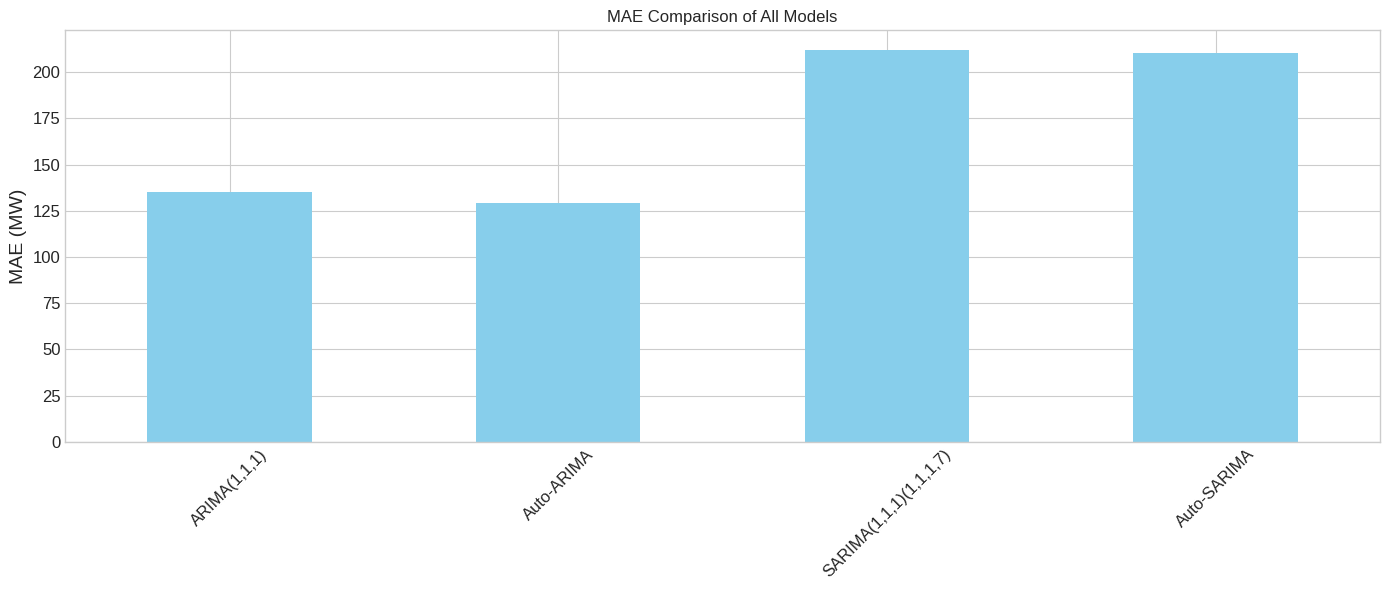

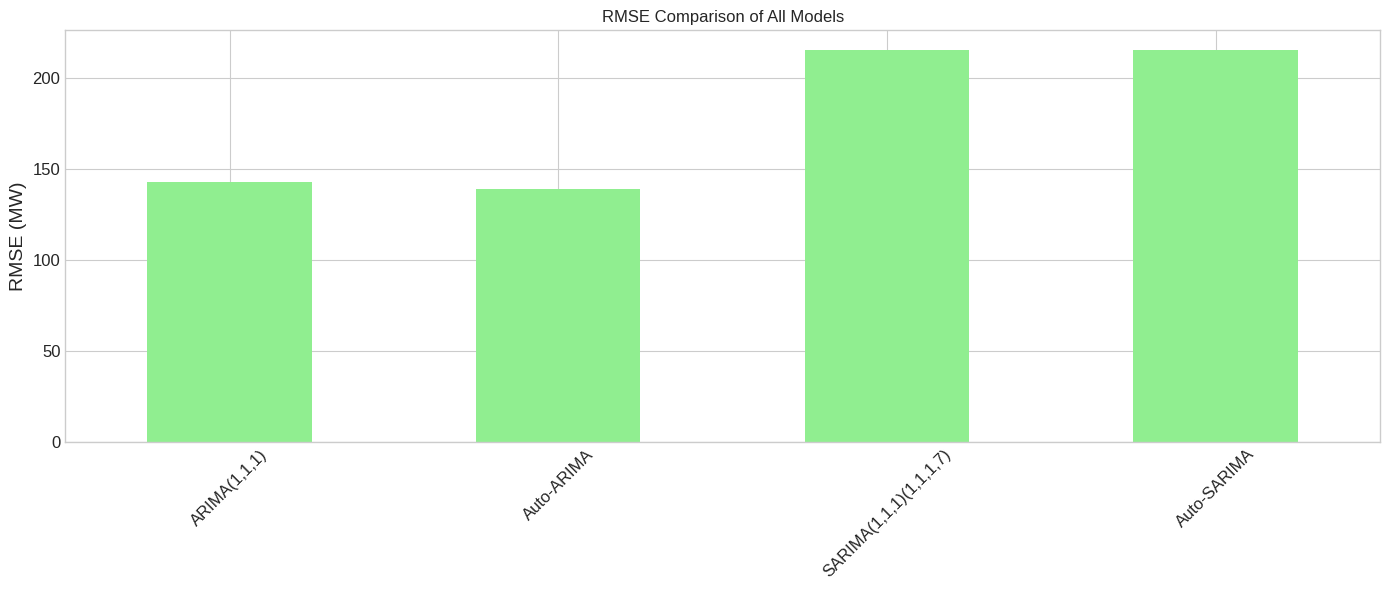

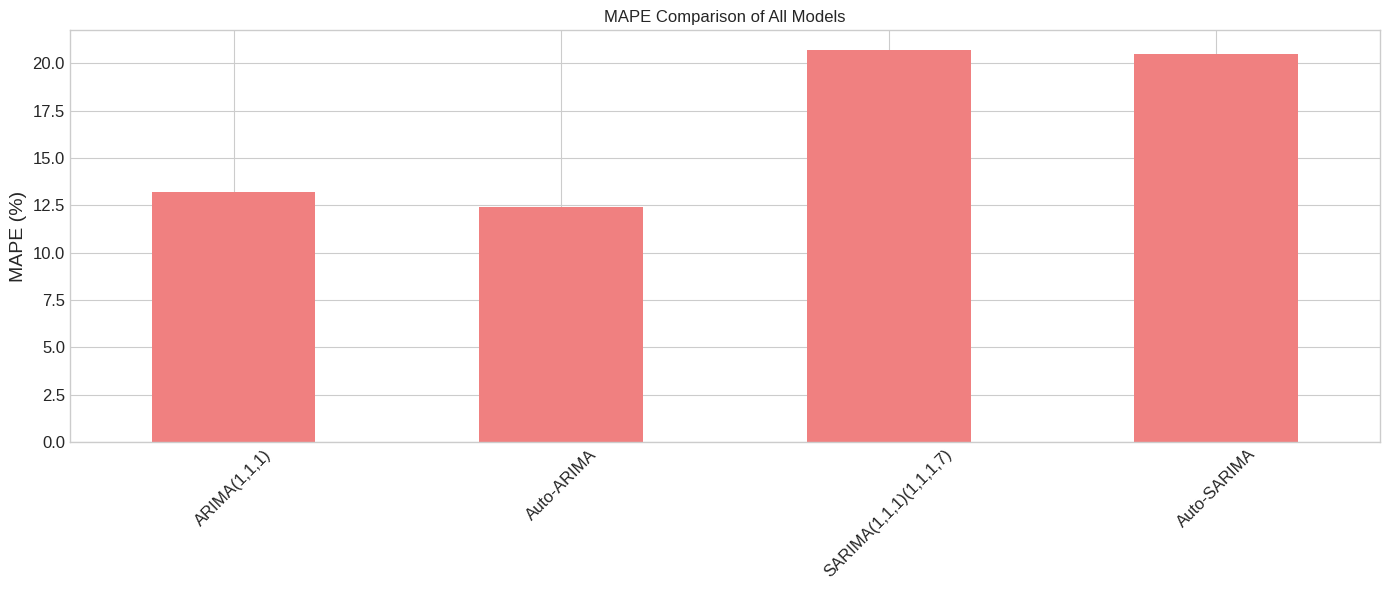


Model Performance Summary:
-------------------------
Best model by MAE: Auto-ARIMA with 129.01 MW
Best model by RMSE: Auto-ARIMA with 138.90 MW
Best model by MAPE: Auto-ARIMA with 12.41%


In [ ]:
# Install necessary packages
!pip install pandas numpy matplotlib seaborn statsmodels scikit-learn

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
from datetime import datetime, timedelta
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import itertools

# Turn off warnings
warnings.filterwarnings("ignore")

# Set graph style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

# Set seed for reproducibility
np.random.seed(42)

print("# LAB 3: ARIMA/SARIMA Models for Time Series Analysis in Electrical Systems")
print("=" * 100)

# Part 1: Creating Simulated Electricity Production Data
print("\n## Part 1: Creating Simulated Electricity Production Data")

def create_power_production_data(start_date='2020-01-01', end_date='2022-12-31'):
    # สร้างช่วงวันที่
    date_range = pd.date_range(start=start_date, end=end_date, freq='H')
    df = pd.DataFrame(index=date_range)

    # 1. แนวโน้ม (Trend) - การเติบโตของความต้องการไฟฟ้า 3% ต่อปี
    days = (df.index - df.index[0]).total_seconds() / (24*60*60)
    daily_growth = (1.03)**(1/365) # การเติบโต 3% ต่อปี
    trend = 1000 * (daily_growth ** (days))

    # 2. ฤดูกาล (Seasonality)
    # ฤดูกาลรายปี - ความต้องการไฟฟ้าเพิ่มขึ้นในฤดูร้อนและฤดูหนาว
    yearly_seasonality = 150 * np.sin(2 * np.pi * days / 365)

    # ฤดูกาลรายวัน - สูงในช่วงกลางวัน ต่ำในช่วงกลางคืน
    hour_of_day = df.index.hour
    daily_pattern = 100 * np.sin(np.pi * hour_of_day / 12)

    # ฤดูกาลรายสัปดาห์ - ต่ำในวันหยุดสุดสัปดาห์
    day_of_week = df.index.dayofweek
    weekly_pattern = np.where(day_of_week >= 5, -80, 0) # ลด 80 หน่วยในวันเสาร์-อาทิตย์

    # 3. วัฏจักร (Cyclical) - วัฏจักรทางเศรษฐกิจประมาณ 3 ปี
    cycle_period = 3 * 365 # วัฏจักร 3 ปี
    cyclical = 70 * np.sin(2 * np.pi * days / cycle_period)

    # 4. Irregular Component - ความผันผวนทั่วไปและเหตุการณ์พิเศษ
    np.random.seed(42) # ตั้งค่า seed สำหรับการสร้างค่าแบบสุ่ม
    irregular = np.random.normal(0, 30, len(df))

    # เพิ่มเหตุการณ์พิเศษบางวัน (เช่น ไฟดับหรือซ่อมบำรุงโรงไฟฟ้า)
    special_events = pd.Series(0, index=df.index)

    # สมมติว่ามีการซ่อมบำรุงโรงไฟฟ้าในบางช่วง
    maintenance_periods = [
        ('2021-04-10', '2021-04-15'),
        ('2022-09-05', '2022-09-10')
    ]

    for start, end in maintenance_periods:
        mask = (df.index >= start) & (df.index <= end)
        special_events[mask] = -200 # ลดการผลิตลง 200 หน่วย

    # สมมติว่ามีเหตุการณ์ฉุกเฉินทำให้โรงไฟฟ้าหยุดทำงานชั่วคราว
    emergency_dates = ['2021-07-15', '2022-11-30']
    for date in emergency_dates:
        # ส่งผลกระทบ 48 ชั่วโมง
        start_date = pd.Timestamp(date)
        end_date = start_date + pd.Timedelta(hours=48)
        mask = (df.index >= start_date) & (df.index < end_date)
        special_events[mask] = -350 # ลดการผลิตลง 350 หน่วย

    # รวมองค์ประกอบทั้งหมด
    df['power_production'] = trend + yearly_seasonality + daily_pattern + weekly_pattern + cyclical + irregular + special_events

    # ปรับให้ค่าต่ำสุดไม่น้อยกว่า 100 (กำลังการผลิตขั้นต่ำ)
    df['power_production'] = df['power_production'].clip(lower=100)

    # เพิ่มคอลัมน์ข้อมูลเวลาที่ง่ายต่อการวิเคราะห์
    df['hour'] = df.index.hour
    df['day'] = df.index.day
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['day_of_week'] = df.index.dayofweek
    df['weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

    return df

# Create simulated data
print("Creating hourly electricity production simulation data...")
data = create_power_production_data(start_date='2020-01-01', end_date='2022-12-31')

# Display data graph
plt.figure(figsize=(14, 6))
plt.plot(data.index, data['power_production'])
plt.title('Hourly Electricity Production Data (2020-2022)')
plt.xlabel('Date')
plt.ylabel('Production Capacity (MW)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Work with daily data
daily_data = data.resample('D').mean()
print(f"\nCreated daily data by resampling from hourly data: {daily_data.shape[0]} days")

# Display daily data
plt.figure(figsize=(14, 6))
plt.plot(daily_data.index, daily_data['power_production'])
plt.title('Daily Electricity Production Data (2020-2022)')
plt.xlabel('Date')
plt.ylabel('Average Production (MW)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Part 2: Data Preparation and Dataset Splitting
print("\n## Part 2: Data Preparation and Dataset Splitting")

# Split data into training and testing sets
train_data = daily_data[:'2022-11-30']
test_data = daily_data['2022-12-01':]

print(f"Dataset dimensions:")
print(f"Total data: {len(daily_data)} days")
print(f"Training set: {len(train_data)} days (Jan 2020 - Nov 2022)")
print(f"Test set: {len(test_data)} days (Dec 2022)")

# Function for calculating evaluation metrics
def calculate_metrics(actual, forecast):
    """Calculate various metrics for model evaluation"""
    mae = mean_absolute_error(actual, forecast)
    rmse = np.sqrt(mean_squared_error(actual, forecast))
    mape = np.mean(np.abs((actual - forecast) / actual)) * 100

    return {
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape
    }

# Function for displaying forecast results
def plot_forecast_results(train_data, test_data, forecast, model_name):
    """Display forecast results compared to actual data"""
    plt.figure(figsize=(14, 6))
    plt.plot(train_data.index, train_data['power_production'], label='Training Data')
    plt.plot(test_data.index, test_data['power_production'], label='Actual Data', color='blue')
    plt.plot(test_data.index, forecast, label='Forecast', color='red', linestyle='--')
    plt.title(f'Forecast Results Using {model_name}')
    plt.xlabel('Date')
    plt.ylabel('Average Production (MW)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Display metrics
    metrics = calculate_metrics(test_data['power_production'], forecast)
    print(f"\nModel Evaluation Results for {model_name}:")
    print(f"MAE: {metrics['MAE']:.2f} MW")
    print(f"RMSE: {metrics['RMSE']:.2f} MW")
    print(f"MAPE: {metrics['MAPE']:.2f}%")

    return metrics

# Part 3: Manual Auto-ARIMA Implementation
print("\n## Part 3: Manual Auto-ARIMA Implementation")

class ManualAutoARIMA:
    """
    Class for finding the best ARIMA parameters using grid search
    """

    def __init__(self, order=None, seasonal_order=None):
        self.order = order
        self.seasonal_order = seasonal_order
        self.model = None
        self.aic = None

    def fit(self, data, **kwargs):
        """Use data to train the ARIMA model"""
        if self.order is not None:
            model = ARIMA(data, order=self.order)
            self.model = model.fit()
            self.aic = self.model.aic
        return self

    def predict(self, n_periods=1, **kwargs):
        """Forecast data n_periods steps ahead"""
        if self.model is not None:
            return self.model.forecast(steps=n_periods)
        else:
            raise ValueError("Model has not been trained (fit) yet")

    def summary(self):
        """Display model summary"""
        if self.model is not None:
            return self.model.summary()
        else:
            return "Model has not been trained (fit) yet"

def manual_auto_arima(data, seasonal=False, m=None, start_p=0, start_q=0,
                     max_p=5, max_q=5, start_P=0, start_Q=0, max_P=2, max_Q=2,
                     d=None, D=None, trace=True, **kwargs):
    """
    Function that simulates auto_arima using grid search
    """
    best_aic = float('inf')
    best_order = None
    best_seasonal_order = None
    best_model_fit = None

    # Set d and D values
    if d is None:
        d_range = range(0, 2)  # Try d=0, 1
    else:
        d_range = [d]

    if seasonal and D is None:
        D_range = range(0, 2)  # Try D=0, 1
    elif seasonal:
        D_range = [D]

    # Create parameter ranges
    p_range = range(start_p, max_p + 1)
    q_range = range(start_q, max_q + 1)

    if trace:
        print("Searching for best parameters...")

    # Try ARIMA(p,d,q) models without seasonality
    if not seasonal:
        for p, d, q in itertools.product(p_range, d_range, q_range):
            try:
                model = ARIMA(data, order=(p, d, q))
                model_fit = model.fit()

                if trace:
                    print(f"ARIMA({p},{d},{q}) - AIC: {model_fit.aic:.2f}")

                if model_fit.aic < best_aic:
                    best_aic = model_fit.aic
                    best_order = (p, d, q)
                    best_model_fit = model_fit
            except Exception as e:
                if trace:
                    print(f"ARIMA({p},{d},{q}) - Error: {str(e)[:50]}...")
                continue

    # Try SARIMA(p,d,q)(P,D,Q,m) models with seasonality
    else:
        if m is None:
            raise ValueError("Must specify m (seasonal period length) when seasonal=True")

        P_range = range(start_P, max_P + 1)
        Q_range = range(start_Q, max_Q + 1)

        for p, d, q, P, D, Q in itertools.product(p_range, d_range, q_range, P_range, D_range, Q_range):
            try:
                model = SARIMAX(data, order=(p, d, q), seasonal_order=(P, D, Q, m))
                model_fit = model.fit(disp=False)

                if trace:
                    print(f"SARIMA({p},{d},{q})({P},{D},{Q},{m}) - AIC: {model_fit.aic:.2f}")

                if model_fit.aic < best_aic:
                    best_aic = model_fit.aic
                    best_order = (p, d, q)
                    best_seasonal_order = (P, D, Q, m)
                    best_model_fit = model_fit
            except Exception as e:
                if trace:
                    print(f"SARIMA({p},{d},{q})({P},{D},{Q},{m}) - Error: {str(e)[:50]}...")
                continue

    # Create the best model
    best_model = ManualAutoARIMA(order=best_order, seasonal_order=best_seasonal_order)
    best_model.model = best_model_fit
    best_model.aic = best_aic

    if trace:
        if not seasonal:
            print(f"\nBest model: ARIMA{best_order} with AIC: {best_aic:.2f}")
        else:
            print(f"\nBest model: SARIMA{best_order}{best_seasonal_order} with AIC: {best_aic:.2f}")

    return best_model

# Part 4: ACF and PACF Analysis and Parameter Selection for ARIMA Models
print("\n## Part 4: ACF and PACF Analysis and Parameter Selection for ARIMA Models")

# Function for ADF test
def adf_test(series):
    """Test data stationarity using Augmented Dickey-Fuller test"""
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.4f}')

    if result[1] <= 0.05:
        print("Data is stationary, suitable for ARIMA modeling")
    else:
        print("Data is non-stationary, may need transformation before using ARIMA models")

    return result[1] <= 0.05  # Return True if data is stationary

# Test stationarity of original data
print("Testing stationarity of original data:")
is_stationary = adf_test(train_data['power_production'])

# If data is non-stationary, transform with differencing
if not is_stationary:
    print("\nApplying First-order differencing to improve stationarity:")
    train_diff = train_data['power_production'].diff().dropna()
    is_diff_stationary = adf_test(train_diff)

    # Display differenced data
    plt.figure(figsize=(14, 6))
    plt.plot(train_data.index[1:], train_diff)
    plt.title('Data After First-order Differencing')
    plt.xlabel('Date')
    plt.ylabel('Change in Production (MW)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Function to display ACF and PACF
def plot_acf_pacf(series, title='', lags=40):
    """Display ACF and PACF graphs"""
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))

    # ACF
    plot_acf(series, ax=axes[0], lags=lags)
    axes[0].set_title(f'Autocorrelation Function (ACF) - {title}')
    axes[0].grid(True)

    # PACF
    plot_pacf(series, ax=axes[1], lags=lags)
    axes[1].set_title(f'Partial Autocorrelation Function (PACF) - {title}')
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

# Analyze ACF and PACF of original data
print("\nAnalyzing ACF and PACF of original data:")
plot_acf_pacf(train_data['power_production'], title='Original Data')

# Parameter selection for ARIMA model
if is_stationary:
    p, d, q = 2, 0, 2
else:
    p, d, q = 1, 1, 1

print(f"\nSelected parameters: ARIMA({p},{d},{q})")

# Build ARIMA model
arima_model = ARIMA(train_data['power_production'], order=(p, d, q))
arima_fit = arima_model.fit()

# Forecast ahead
arima_forecast = arima_fit.forecast(steps=len(test_data))

# Display forecast results
arima_metrics = plot_forecast_results(train_data, test_data, arima_forecast, f"ARIMA({p},{d},{q})")

# Using Manual Auto-ARIMA to find the best parameters
print("\n### Using Manual Auto-ARIMA to Find the Best Parameters")
auto_arima_model = manual_auto_arima(
    train_data['power_production'],
    seasonal=False,
    start_p=0, start_q=0,
    max_p=2, max_q=2,
    d=None,
    trace=True
)

# Forecast ahead
auto_arima_forecast = auto_arima_model.predict(n_periods=len(test_data))

# Display forecast results
auto_arima_metrics = plot_forecast_results(train_data, test_data, auto_arima_forecast, f"Manual Auto-ARIMA {auto_arima_model.order}")

# Part 5: Developing SARIMA Models for Seasonal Data
print("\n## Part 5: Developing SARIMA Models for Seasonal Data")

# Display weekly seasonal averages
def seasonal_plot(data, period, title):
    """Display data by seasonal pattern"""
    season_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    grouped_data = data.groupby(data.index.dayofweek)['power_production'].mean()

    plt.figure(figsize=(10, 6))
    plt.plot(grouped_data.index, grouped_data.values, marker='o')
    plt.title(title)
    plt.xlabel('Day of Week')
    plt.ylabel('Average Production (MW)')
    plt.xticks(range(7), season_labels)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

seasonal_plot(train_data, 7, 'Average Electricity Production by Day of Week')

# Build SARIMA model
print(f"\nBuilding SARIMA({p},{d},{q})(1,1,1,7)")
sarima_model = SARIMAX(
    train_data['power_production'],
    order=(p, d, q),
    seasonal_order=(1, 1, 1, 7)
)
sarima_fit = sarima_model.fit(disp=False)

# Forecast ahead
sarima_forecast = sarima_fit.forecast(steps=len(test_data))

# Display forecast results
sarima_metrics = plot_forecast_results(train_data, test_data, sarima_forecast, f"SARIMA({p},{d},{q})(1,1,1,7)")

# Using Manual Auto-ARIMA with seasonality
print("\n### Using Seasonal Manual Auto-ARIMA")
seasonal_auto_arima_model = manual_auto_arima(
    train_data['power_production'],
    seasonal=True,
    m=7,  # Length of seasonality (7 days)
    start_p=0, start_q=0,
    max_p=2, max_q=2,
    start_P=0, start_Q=0,
    max_P=1, max_Q=1,
    d=None, D=None,
    trace=True
)

# Forecast ahead
seasonal_auto_arima_forecast = seasonal_auto_arima_model.predict(n_periods=len(test_data))

# Display forecast results
seasonal_auto_arima_metrics = plot_forecast_results(
    train_data,
    test_data,
    seasonal_auto_arima_forecast,
    f"Manual Auto-SARIMA {seasonal_auto_arima_model.order}x{seasonal_auto_arima_model.seasonal_order}"
)

# Part 6: Performance Comparison of All Models and Conclusion
print("\n## Part 6: Performance Comparison of All Models and Conclusion")

# Create comparison table for all models
all_models_comparison = pd.DataFrame({
    f'ARIMA({p},{d},{q})': [arima_metrics['MAE'], arima_metrics['RMSE'], arima_metrics['MAPE']],
    'Auto-ARIMA': [auto_arima_metrics['MAE'], auto_arima_metrics['RMSE'], auto_arima_metrics['MAPE']],
    f'SARIMA({p},{d},{q})(1,1,1,7)': [sarima_metrics['MAE'], sarima_metrics['RMSE'], sarima_metrics['MAPE']],
    'Auto-SARIMA': [seasonal_auto_arima_metrics['MAE'], seasonal_auto_arima_metrics['RMSE'], seasonal_auto_arima_metrics['MAPE']],
}, index=['MAE (MW)', 'RMSE (MW)', 'MAPE (%)'])

print("\nPerformance Comparison Table of All Models:")
print(all_models_comparison)

# Create bar chart comparing MAE
plt.figure(figsize=(14, 6))
all_models_comparison.loc['MAE (MW)'].plot(kind='bar', color='skyblue')
plt.title('MAE Comparison of All Models')
plt.ylabel('MAE (MW)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create bar chart comparing RMSE
plt.figure(figsize=(14, 6))
all_models_comparison.loc['RMSE (MW)'].plot(kind='bar', color='lightgreen')
plt.title('RMSE Comparison of All Models')
plt.ylabel('RMSE (MW)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create bar chart comparing MAPE
plt.figure(figsize=(14, 6))
all_models_comparison.loc['MAPE (%)'].plot(kind='bar', color='lightcoral')
plt.title('MAPE Comparison of All Models')
plt.ylabel('MAPE (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Summary
print("\nModel Performance Summary:")
print("-------------------------")
print(f"Best model by MAE: {all_models_comparison.loc['MAE (MW)'].idxmin()} with {all_models_comparison.loc['MAE (MW)'].min():.2f} MW")
print(f"Best model by RMSE: {all_models_comparison.loc['RMSE (MW)'].idxmin()} with {all_models_comparison.loc['RMSE (MW)'].min():.2f} MW")
print(f"Best model by MAPE: {all_models_comparison.loc['MAPE (%)'].idxmin()} with {all_models_comparison.loc['MAPE (%)'].min():.2f}%")